In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pbp = pd.read_csv('pbp_data/play_by_play_2020.csv.gz', compression='gzip', low_memory=False)

In [3]:
receivers = pbp.groupby(['posteam', 'receiver'], as_index=False) \
            .agg({'pass_attempt':'sum', 'first_down':'sum', 'air_yards':'mean'}) \
            .rename(columns={'pass_attempt':'targets', 'first_down':'first_downs', 'air_yards':'aDOT'})
team_atts = pbp.groupby('posteam').agg({'pass_attempt':'sum'}).rename(columns={'pass_attempt':'team_attempts'})
receivers = receivers.merge(team_atts, on='posteam')
receivers['target_share'] = receivers['targets']/receivers['team_attempts']
receivers['1D_per_TPA'] = receivers['first_downs']/receivers['team_attempts']

In [4]:
receivers.sort_values('1D_per_TPA', ascending=False)[:10]

,posteam,receiver,targets,first_downs,aDOT,team_attempts,target_share,1D_per_TPA
6,ARI,D.Hopkins,151.0,83.0,8.673333,575.0,0.262609,0.144348
181,GB,D.Adams,143.0,72.0,8.930070,522.0,0.273946,0.137931
55,BUF,S.Diggs,158.0,78.0,10.113924,585.0,0.270085,0.133333
264,KC,T.Kelce,146.0,82.0,8.413793,624.0,0.233974,0.131410
295,LV,D.Waller,136.0,69.0,7.742647,538.0,0.252788,0.128253
79,CHI,A.Robinson,146.0,71.0,9.636986,609.0,0.239737,0.116585
450,SEA,D.Metcalf,120.0,66.0,13.791667,575.0,0.208696,0.114783
498,TEN,A.Brown,95.0,55.0,10.757895,484.0,0.196281,0.113636
18,ATL,C.Ridley,134.0,69.0,15.030303,627.0,0.213716,0.110048
333,MIN,J.Jefferson,116.0,57.0,11.654867,520.0,0.223077,0.109615


0.934991283847172

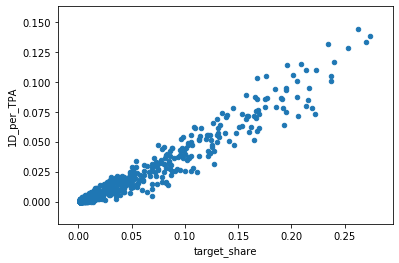

In [5]:
receivers.plot.scatter('target_share', '1D_per_TPA')
receivers.corr().loc['target_share', '1D_per_TPA']**2

In [6]:
fit = np.polyfit(receivers['target_share'], receivers['1D_per_TPA'], 1)
exp_1D_TPA = np.poly1d(fit)
receivers['exp_1D_TPA'] = exp_1D_TPA(receivers['target_share'])
receivers['FDOTS'] = receivers['1D_per_TPA'] - receivers['exp_1D_TPA']
receivers.sort_values('FDOTS', ascending=False)[:10][['posteam', 'receiver', 'FDOTS']]
top_receivers_df = receivers.sort_values('FDOTS', ascending=False)[:10][['posteam','receiver', 'FDOTS']]
top_receivers = [(x[1], x[2]) for x in list(top_receivers_df.to_records())]

,posteam,receiver,FDOTS
502,TEN,C.Davis,0.029796
490,TB,M.Evans,0.027848
264,KC,T.Kelce,0.027755
6,ARI,D.Hopkins,0.027736
498,TEN,A.Brown,0.027038
450,SEA,D.Metcalf,0.022566
226,IND,T.Hilton,0.020622
327,MIN,A.Thielen,0.016618
181,GB,D.Adams,0.016189
295,LV,D.Waller,0.016085


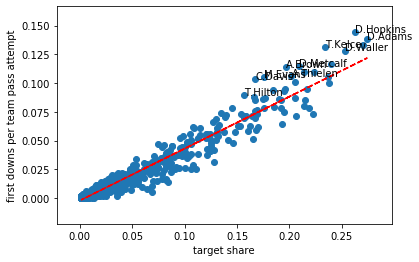

In [7]:
fix, ax = plt.subplots()
x = receivers['target_share']
y = receivers['1D_per_TPA']
ax.scatter(x, y)
for i, name in enumerate(receivers['receiver']):
    if (receivers['posteam'].iloc[i],name) in top_receivers:
        ax.annotate(name, (x.iloc[i], y.iloc[i]))
ax.plot(x, exp_1D_TPA(x), 'r--')
ax.set(xlabel='target share', ylabel='first downs per team pass attempt')
top_receivers_df

In [8]:
receivers['first_down_rate'] = receivers['first_downs']/receivers['targets']
receivers.corr().round(3)

,targets,first_downs,aDOT,team_attempts,target_share,1D_per_TPA,exp_1D_TPA,FDOTS,first_down_rate
targets,1.000,0.967,0.191,0.120,0.992,0.957,0.992,-0.008,0.093
first_downs,0.967,1.000,0.251,0.091,0.962,0.993,0.962,0.245,0.190
aDOT,0.191,0.251,1.000,0.009,0.194,0.252,0.194,0.256,0.078
team_attempts,0.120,0.091,0.009,1.000,0.033,0.016,0.033,-0.062,-0.052
target_share,0.992,0.962,0.194,0.033,1.000,0.967,1.000,-0.000,0.097
1D_per_TPA,0.957,0.993,0.252,0.016,0.967,1.000,0.967,0.255,0.194
exp_1D_TPA,0.992,0.962,0.194,0.033,1.000,0.967,1.000,-0.000,0.097
FDOTS,-0.008,0.245,0.256,-0.062,-0.000,0.255,-0.000,1.000,0.393
first_down_rate,0.093,0.190,0.078,-0.052,0.097,0.194,0.097,0.393,1.000
